In [ ]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from tqdm import tqdm
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat

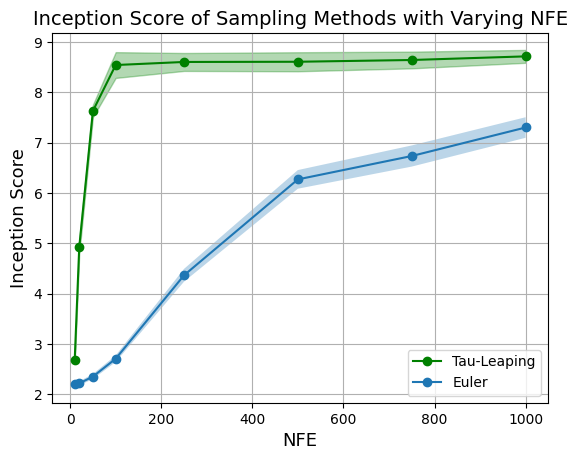

In [13]:

steps = np.array([10, 20, 50, 100, 250, 500, 750, 1000])
mean_is_taul = np.array([2.68, 4.93, 7.63, 8.54, 8.601, 8.605, 8.64, 8.712])
std_is_taul = np.array([0.0688, 0.138, 0.123, 0.256, 0.178, 0.189, 0.166, 0.128])
mean_is_lbjf = np.array([2.2, 2.22, 2.356, 2.71,  4.366, 6.27, 6.734, 7.3])
std_is_lbjf = np.array([0.03, 0.04, 0.050, 0.065,  0.127,  0.185, 0.21, 0.204])

plt.plot(steps, mean_is_taul, marker='o', color='green', label='Tau-Leaping')
plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_taul, std_is_taul)],
                 [mean + std for mean, std in zip(mean_is_taul, std_is_taul)],
                 alpha=0.3, color='green')
plt.plot(steps, mean_is_lbjf, marker='o', label='Euler')
plt.fill_between(steps, [mean - std for mean, std in zip(mean_is_lbjf, std_is_lbjf)],
                 [mean + std for mean, std in zip(mean_is_lbjf, std_is_lbjf)],
                 alpha=0.3)

plt.xlabel('NFE', fontsize=13)
plt.ylabel('Inception Score', fontsize=13)
plt.title('Inception Score of Sampling Methods with Varying NFE', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig('inception_score.png')
plt.show()

In [ ]:
steps = np.array([10, 20, 50, 100, 250, 500, 750, 1000])
mean_is_taul = np.array([2.68, 4.93, 7.63, 8.601, 8.54, 8.605, 8.66, 8.712])
std_is_taul = np.array([0.0688, 0.138, 0.123, 0.256, 0.178, 0.189, 0.15, 0.128])
mean_is_lbjf = np.array([2.2, 2.22, 2.356, 2.71,  4.366, 6.27, 6.734, 7.3])
std_is_lbjf = np.array([0.03, 0.04, 0.050, 0.065,  0.127,  0.185, 0.344, 0.204])

In [ ]:
# LBJF
# 10
# Inception mean:  2.198198056219918
# Inception std:  0.030151815824951578


#20
# Inception mean:  2.2240022875289394
# Inception std:  0.04002556276635036


#50
#Inception mean:  2.3566081056175205
#Inception std:  0.04870976690873823


#100
# Inception mean:  2.709736001921302
# Inception std:  0.06546383931077572

# 250
# Inception mean:  4.366223557997307
#Inception std:  0.12693698997288722

# 500
# Inception mean:  6.270140895472088
# Inception std:  0.18477733149537678

#750
#Inception mean:  6.734108512036066
#Inception std:  0.3443336055401

#1000
# Inception mean:  7.307791114561004
# Inception std:  0.20425301145961688


# TauL
# 10
#Inception mean:  2.682454029072186
#Inception std:  0.10887427294896481

#20
#Inception mean:  4.937553814295971
#Inception std:  0.13792913359753387

# 50
#Inception mean:  7.626723958044647
#Inception std:  0.12262230861087985

# 100
# Inception mean:  8.601645363936745
# Inception std:  0.25602074226782967

#250
#Inception mean:  8.54639863839709
#Inception std:  0.17805105174721006

#500
#Inception mean:  8.605389185830521
# Inception std:  0.18978970334759312

#1000
# Inception mean:  8.71253495184714
# Inception std:  0.1287123665975524


